In [ ]:
from google.colab import drive
drive.mount('/content/gdrive')

Mounted at /content/gdrive


In [ ]:
# Se cargan las dependencias necesarias
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.utils import to_categorical

from keras.models import Sequential
from keras.layers import Dense, Conv1D, Flatten, MaxPooling1D

import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt
import matplotlib as mpl

              protected                                                         signature                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                                               

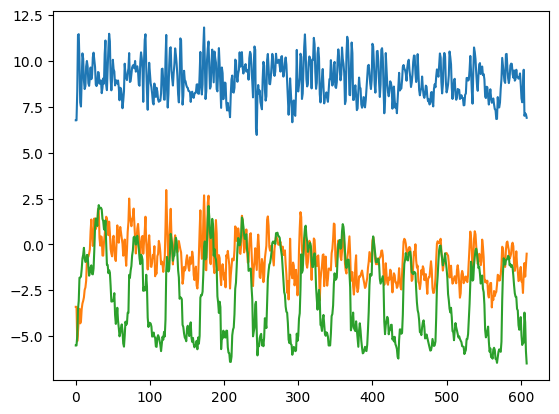

In [ ]:
RutaFile="/content/gdrive/MyDrive/Procesamiento Datos Secuenciales/wash_teeth_classifier-export/training/front_correct.4e5gkrtl.ingestion-65df76d555-dxvr4.json"
dataframe = pd.read_json(RutaFile)
print(dataframe.to_string())
Valores = dataframe.iloc[:,:].values
print(Valores.shape)
print(Valores)
print(Valores[7,2][0:-1])

DatosOri1=Valores[7,2][0:-1]
Datos1=np.array(DatosOri1)
print(Datos1.shape)
plt.plot(Datos1)

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Procesamiento Datos Secuenciales/wash_teeth_classifier-export/training/'
files = os.listdir(directory)
files.sort()
cantidadFiles = len(files)

Datos=np.zeros((cantidadFiles*600,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  Datos[i*600:(i+1)*600] = DatosOriNP[0:600]
  i+=1
print(Datos.shape)



(54000, 3)


In [ ]:
print(files)

['front_correct.4e5gh6bf.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gkaof.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gkrtl.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gldia.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gltur.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gn3pl.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gnkad.ingestion-65df76d555-xrbth.json', 'front_correct.4e5grbs1.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5grr29.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gsbj4.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gss36.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gt9lj.ingestion-65df76d555-xrbth.json', 'front_correct.4e5guebr.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gvdop.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gvsbs.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5h17rr.ingestion-65df76d555-xrbth.json', 'front_correct.4e5h1p38.ingestion-65df76d555-dxvr4.json', 'front_correc

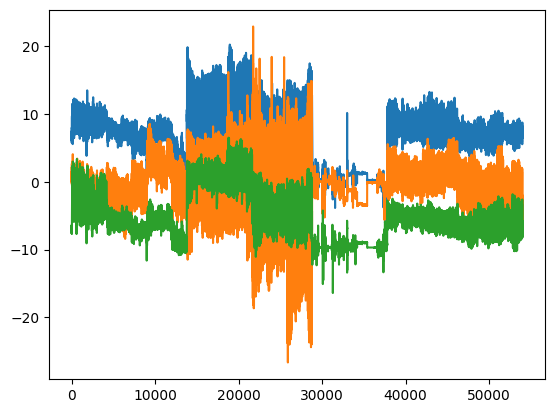

In [ ]:
plt.plot(Datos)

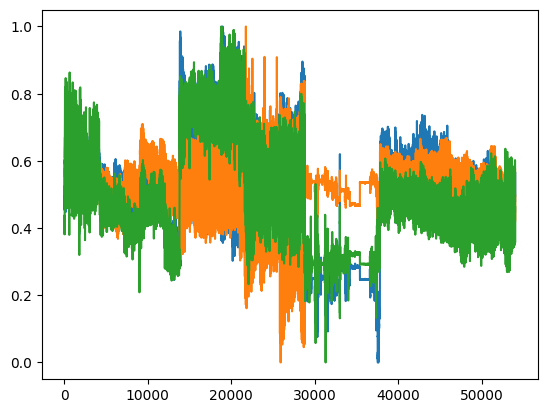

In [ ]:
scaler1 = MinMaxScaler()
scaler1.fit(Datos)
DatosN=scaler1.transform(Datos)
plt.plot(DatosN)

In [ ]:
Xtrain=np.zeros((90,600, 3))

#for i in range(90):
 #   Xtrain[i,:]=np.concatenate((Datos[i*600:(i+1)*600,0].T,Datos[i*600:(i+1)*600,1].T,Datos[i*600:(i+1)*600,2].T),axis=0)

for i in range(90):
  Xtrain[i,:,0]=Datos[i*600:(i+1)*600,0].T
  Xtrain[i,:,1]=Datos[i*600:(i+1)*600,1].T
  Xtrain[i,:,2]=Datos[i*600:(i+1)*600,2].T

print(Xtrain.shape)


(90, 600, 3)


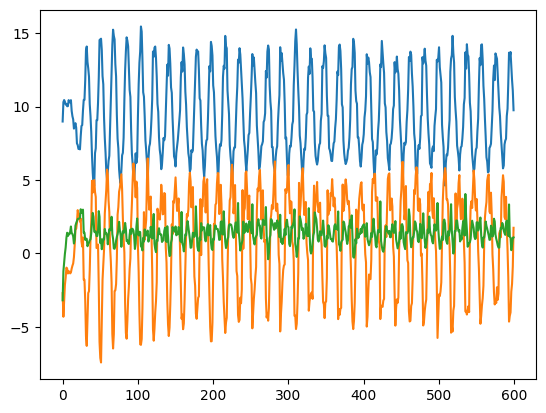

In [ ]:
plt.plot(Xtrain[25,:])

In [ ]:
YtrainIni=np.zeros((90,1))
for i in range(23):
    YtrainIni[i]=0 #front correct

for i in range(23,48):
    YtrainIni[i]=1 # incorrect

for i in range(48,63):
    YtrainIni[i]=2 # no wash

for i in range(63,90):
    YtrainIni[i]=3 # top correct
print(YtrainIni)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]


In [ ]:
Ytrain= to_categorical(YtrainIni)
print(Ytrain)

[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0.

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 simple_rnn_26 (SimpleRNN)   (None, 600, 5)            45        
                                                                 
 simple_rnn_27 (SimpleRNN)   (None, 600, 10)           160       
                                                                 
 simple_rnn_28 (SimpleRNN)   (None, 15)                390       
                                                                 
 dense_9 (Dense)             (None, 4)                 64        
                                                                 
Total params: 659 (2.57 KB)
Trainable params: 659 (2.57 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


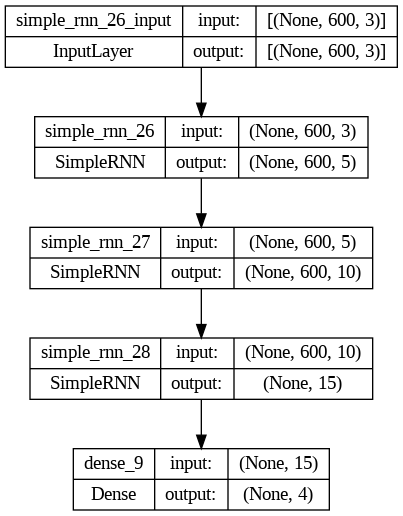

In [ ]:
# Se crea el modelo secuencial en Keras con capas densas
modelo = keras.models.Sequential()
modelo.add(keras.layers.SimpleRNN(5, return_sequences=True, input_shape=[600, 3]))
modelo.add(keras.layers.SimpleRNN(10,return_sequences = True))
modelo.add(keras.layers.SimpleRNN(15,return_sequences = False))
modelo.add(keras.layers.Dense(4,activation='softmax'))
# Se muestra el resumen de la arquitectura del modelo
modelo.summary()
# Se muestra un esquema del modelo
keras.utils.plot_model(modelo, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [ ]:
modelo.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
historia = modelo.fit(Xtrain,Ytrain, epochs=1000,batch_size=None,verbose=0)


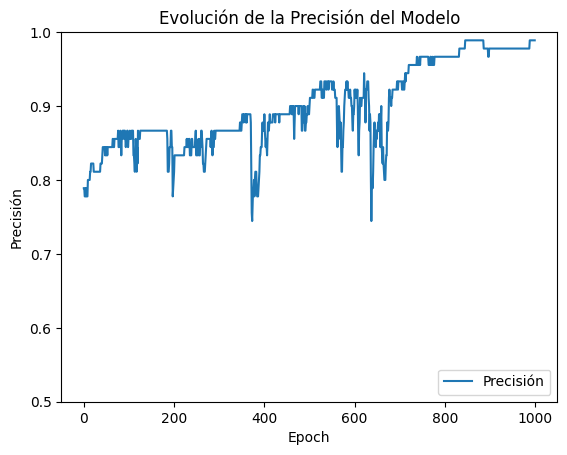

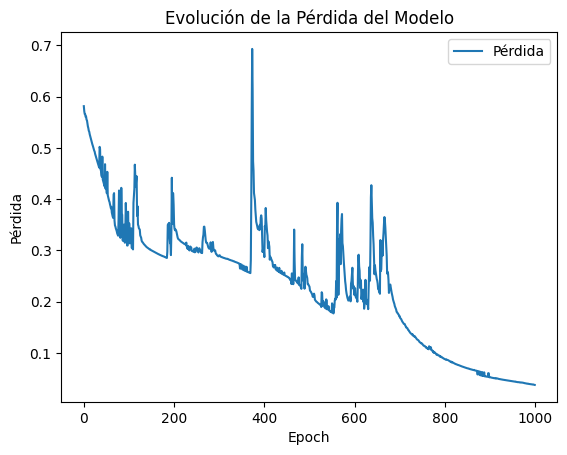

In [ ]:
plt.plot(historia.history['accuracy'], label='Precisión')
plt.title('Evolución de la Precisión del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Precisión')
plt.ylim([0.5, 1])
plt.legend(loc='lower right')
plt.show()

# Plot training & validation loss values
plt.plot(historia.history['loss'], label='Pérdida')
plt.title('Evolución de la Pérdida del Modelo')
plt.xlabel('Epoch')
plt.ylabel('Pérdida')
plt.legend(loc='upper right')
plt.show()

['front_correct.4e5gjbut.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5gmeem.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gou7c.ingestion-65df76d555-xrbth.json', 'front_correct.4e5gtnor.ingestion-65df76d555-dxvr4.json', 'front_correct.4e5gusv0.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5h0a1i.ingestion-65df76d555-5lqbs.json', 'front_correct.4e5h442f.ingestion-65df76d555-xrbth.json', 'front_correct.4e5h51tu.ingestion-65df76d555-5lqbs.json', 'incorrect.top_incorrect.4e5i8l32.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5i93ft.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5ickmd.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5id3cr.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5ifd6d.ingestion-65df76d555-5lqbs.json', 'incorrect.top_incorrect.4e5ifpsq.ingestion-65df76d555-dxvr4.json', 'incorrect.top_incorrect.4e5ih4ja.ingestion-65df76d555-5lqbs.json', 'incorrect.top_incorrect.4e5ihhsv.ingestion-65df76d555-dxvr

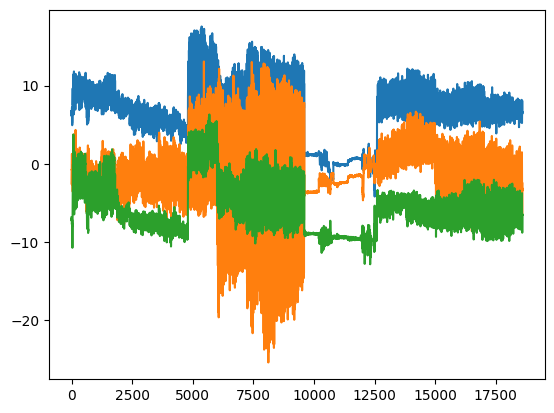

In [ ]:
import os
directory = '/content/gdrive/MyDrive/Procesamiento Datos Secuenciales/wash_teeth_classifier-export/testing/'
files = os.listdir(directory)
files.sort()
print(files)
cantidadFiles = len(files)

DatosVal=np.zeros((cantidadFiles*600,3))
i = 0
for file in files:
  RutaFile=directory + file
  dataframe = pd.read_json(RutaFile)
  Valores = dataframe.iloc[:,:].values
  DatosOriDF=Valores[7,2][0:-1]
  DatosOriNP=np.array(DatosOriDF)
  DatosVal[i*600:(i+1)*600] = DatosOriNP[0:600]
  i+=1
print(DatosVal.shape)
plt.plot(DatosVal)

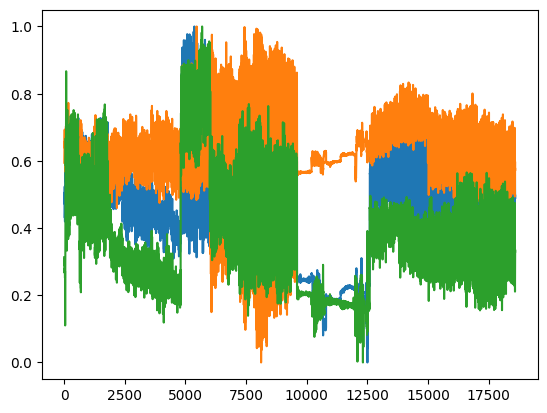

In [ ]:
scaler3 = MinMaxScaler()
scaler3.fit(DatosVal)
DatosValN=scaler3.transform(DatosVal)
plt.plot(DatosValN)

In [ ]:
XVal=np.zeros((31,600,3))

for i in range(31):
  XVal[i,:,0]=DatosVal[i*600:(i+1)*600,0].T
  XVal[i,:,1]=DatosVal[i*600:(i+1)*600,1].T
  XVal[i,:,2]=DatosVal[i*600:(i+1)*600,2].T

print(XVal.shape)


(31, 600, 3)


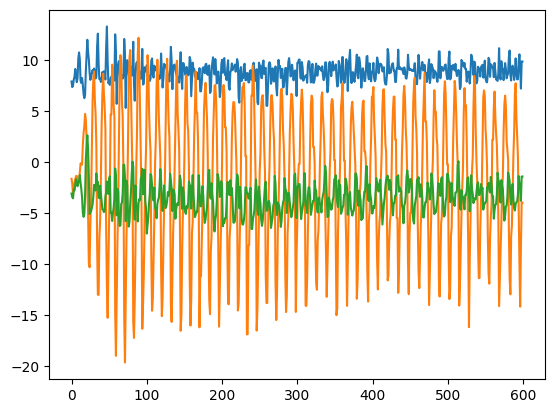

In [ ]:
plt.plot(XVal[10,:])

In [ ]:
YValIni=np.zeros((31,1))
for i in range(8):
    YValIni[i]=0 #front_correct

for i in range(8,16):
    YValIni[i]=1 #incorrect

for i in range(16,21):
    YValIni[i]=2 #no wash

for i in range(21,31):
    YValIni[i]=3 #top correct

print(YValIni)
YVal= to_categorical(YValIni)

print(YVal)

[[0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [0.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [1.]
 [2.]
 [2.]
 [2.]
 [2.]
 [2.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]
 [3.]]
[[1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [1. 0. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 1. 0. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 1. 0.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]
 [0. 0. 0. 1.]]


In [ ]:
modelo.evaluate(XVal, YVal)

1/1 [==============================] - 0s 487ms/step - loss: 0.8691 - accuracy: 0.7097


[0.8691443204879761, 0.7096773982048035]

1/1 [==============================] - 0s 410ms/step
              precision    recall  f1-score   support

           0       0.46      0.75      0.57         8
           1       0.88      0.88      0.88         8
           2       1.00      1.00      1.00         5
           3       0.80      0.40      0.53        10

    accuracy                           0.71        31
   macro avg       0.78      0.76      0.74        31
weighted avg       0.76      0.71      0.71        31

[[6 1 0 1]
 [1 7 0 0]
 [0 0 5 0]
 [6 0 0 4]]


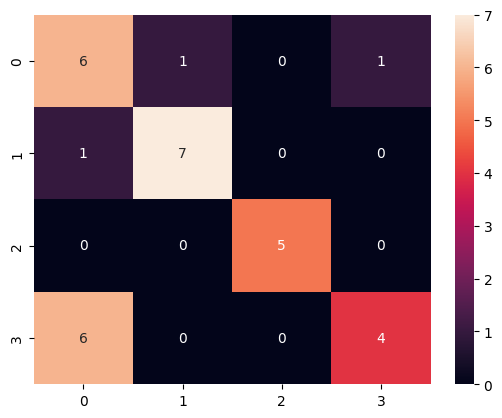

In [ ]:
from sklearn.metrics import classification_report, confusion_matrix
import seaborn as sns

ypredic=modelo.predict(XVal)

y_test_class = np.argmax(YVal,axis=1)
y_pred_class = np.argmax(ypredic,axis=1)

#Accuracy of the predicted values
print(classification_report(y_test_class, y_pred_class)) # Precision , Recall, F1-Score & Support
cm = confusion_matrix(y_test_class, y_pred_class)
print(cm)
# visualize the confusion matrix in a heat map
df_cm = pd.DataFrame(cm)
heatmap = sns.heatmap(df_cm, annot=True, fmt="d")